In [61]:
import pandas as pd
import matplotlib.pyplot as  plt

In [62]:
df = pd.read_csv('people.txt', delimiter=' ')
df


,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [66]:
def rules(data):
    violations = []
    
    # Rule 1
    if not all(0 <= age <= 150 for age in data['Age']):
        violations.append("Violation of Rule 1: Age should be in the range 0-150")

    # Rule 2
    if not all(age > years_married for age, years_married in zip(data['Age'], data['yearsmarried'])):
        violations.append("Violation of Rule 2: Age should be greater than yearsmarried")
        
    # Rule 3
    valid_statuses = {'married', 'single', 'widowed'}
    if not all(status in valid_statuses for status in data['status']):
        violations.append("Violation of Rule 3: Status should be married, single, or widowed")
        
    # Rule 4        
    for age, age_group in zip(data['Age'], data['agegroup']):
        if age < 18 and age_group != 'child':
            violations.append("Violation of Rule 4: Age group should be 'child' for ages less than 18")
            
    for age, age_group in zip(data['Age'], data['agegroup']):
        if 18 <= age < 65 and age_group != 'adult':
            violations.append("Violation of Rule 4: Age group should be 'adult' for ages between 18 and 65")
    
    for age, age_group in zip(data['Age'], data['agegroup']):
        if age >= 65 and age_group != 'elderly':
            violations.append("Violation of Rule 4: Age group should be 'elderly' for ages more than 65")
    
    return violations
            

In [67]:
failures = rules(df)

# Summarize results
if failures:
    print("Violations detected:")
    for violation in failures:
        print(violation)
else:
    print("No violations detected.")


Violations detected:
Violation of Rule 1: Age should be in the range 0-150
Violation of Rule 2: Age should be greater than yearsmarried
Violation of Rule 4: Age group should be 'adult' for ages between 18 and 65


{'Rule': 3, 'Total rules': 4}


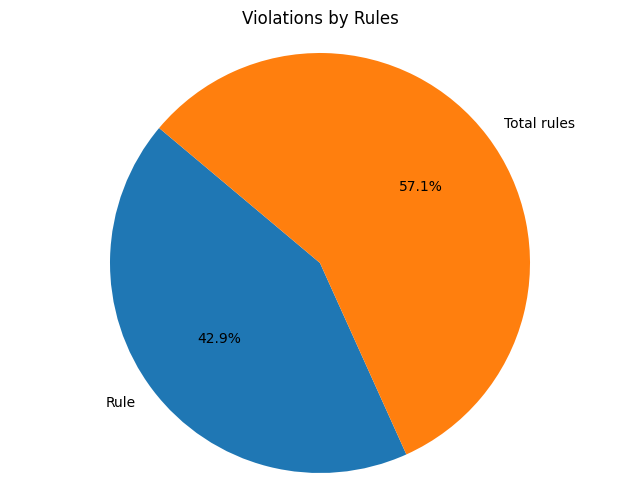

In [65]:
rule_counts = {}
for violation in failures:
    rule_num = violation.split(':')[0].split()[2]
    if rule_num not in rule_counts:
        rule_counts[rule_num] = 1
    else:
        rule_counts[rule_num] += 1

rule_counts['Total rules'] = 4

# Print rule counts
print(rule_counts)

# Plot violations by rule
plt.figure(figsize=(8, 6))
plt.pie(rule_counts.values(), labels=rule_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Violations by Rules')
plt.axis('equal')
plt.show()
